SARSA Q-Table:
State (0, 0): [21.25614251  4.48672995 28.05561465 44.70956609]
State (0, 1): [22.84670804 -1.9345991  -1.84738827  1.41634484]
State (0, 2): [0. 0. 0. 0.]
State (0, 3): [-0.19 -0.1  -0.19 -0.1 ]
State (1, 0): [36.44303027 37.86641958 25.0711861  53.56784244]
State (1, 1): [0. 0. 0. 0.]
State (1, 2): [0. 0. 0. 0.]
State (1, 3): [-0.19 -0.19 -0.1  -0.1 ]
State (2, 0): [37.66265629 63.24878477 35.05841342 32.61253158]
State (2, 1): [40.53687331 26.67902589 45.30131929 73.64394782]
State (2, 2): [56.57145014 -0.19        0.8503975  -0.1       ]
State (2, 3): [-0.1  -0.19 -0.1  10.  ]
State (3, 0): [-0.37639    64.62237867  9.12693699  6.82466494]
State (3, 1): [38.35895103 88.67441404 43.17412574 63.62484534]
State (3, 2): [ 42.87493901 100.          17.32321908  65.31001271]
State (3, 3): [0. 0. 0. 0.]


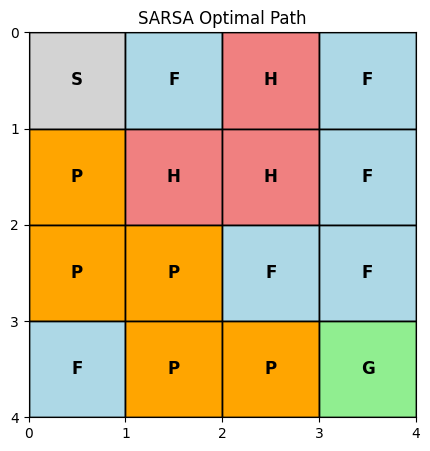

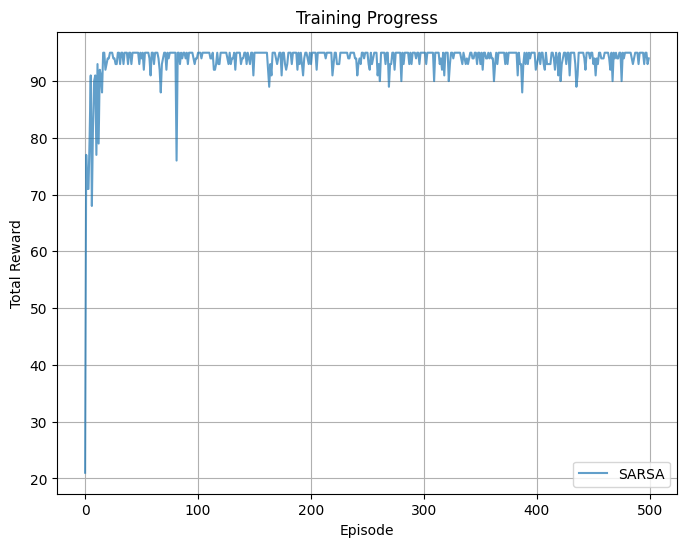

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Frozen Lake Grid dimensions and parameters
GRID_SIZE = 4
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Exploration rate
EPISODES = 500  # Number of episodes

# Initialize Q-table for SARSA
q_table_sarsa = np.zeros((GRID_SIZE, GRID_SIZE, 4))

# Actions: [up, down, left, right]
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Rewards and obstacles
goal = (3, 3)
start = (0, 0)

# Generate random holes avoiding start and goal
num_holes = 3
holes = set()
while len(holes) < num_holes:
    hole = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    if hole != start and hole != goal:
        holes.add(hole)
holes = list(holes)

# Define reward grid
reward_grid = np.full((GRID_SIZE, GRID_SIZE), -1)  # Default reward for moving
reward_grid[goal] = 100  # Goal reward
for hole in holes:
    reward_grid[hole] = -100  # Penalty for holes

# Function to check if a state is valid (not a hole or out of bounds)
def is_valid_state(x, y):
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and (x, y) not in holes

# Function to choose an action using epsilon-greedy policy
def choose_action(state, q_table, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, 3)  # Random action (exploration)
    else:
        x, y = state
        return np.argmax(q_table[x, y])  # Best action (exploitation)

# Training variables
episode_rewards_sarsa = []
exploration_count_sarsa = []

# SARSA Training loop
for episode in range(EPISODES):
    state_sarsa = start
    action_sarsa = choose_action(state_sarsa, q_table_sarsa, EPSILON)
    total_reward_sarsa = 0
    exp_count_sarsa = 0

    while state_sarsa != goal:
        x, y = state_sarsa
        dx, dy = actions[action_sarsa]
        next_state = (x + dx, y + dy) if is_valid_state(x + dx, y + dy) else state_sarsa
        reward = reward_grid[next_state]
        total_reward_sarsa += reward
        next_action = choose_action(next_state, q_table_sarsa, EPSILON)

        # SARSA Update Rule
        next_x, next_y = next_state
        q_table_sarsa[x, y, action_sarsa] += ALPHA * (
            reward + GAMMA * q_table_sarsa[next_x, next_y, next_action] - q_table_sarsa[x, y, action_sarsa]
        )

        state_sarsa, action_sarsa = next_state, next_action
        if random.uniform(0, 1) < EPSILON:
            exp_count_sarsa += 1

    episode_rewards_sarsa.append(total_reward_sarsa)
    exploration_count_sarsa.append(exp_count_sarsa)

# Display Q-table
print("SARSA Q-Table:")
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        print(f"State ({i}, {j}): {q_table_sarsa[i, j]}")

# Function to plot optimal path
def plot_path(q_table, title):
    path = []
    state = start
    visited = set()

    while state != goal:
        if state in visited:
            break
        visited.add(state)
        x, y = state
        action = np.argmax(q_table[x, y])
        dx, dy = actions[action]
        next_state = (x + dx, y + dy)
        if next_state == state or not is_valid_state(*next_state):
            break
        path.append(next_state)
        state = next_state

    # Plot grid and path
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xticks(range(GRID_SIZE + 1))
    ax.set_yticks(range(GRID_SIZE + 1))
    ax.grid(True, color="black", linestyle="-", linewidth=1)
    ax.invert_yaxis()

    colors = {"S": "lightgrey", "G": "lightgreen", "H": "lightcoral", "P": "orange", "F": "lightblue"}
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            label = "F"
            if (i, j) == start:
                label = "S"
            elif (i, j) == goal:
                label = "G"
            elif (i, j) in holes:
                label = "H"
            elif (i, j) in path:
                label = "P"
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=colors[label], ec="black"))
            ax.text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, fontweight='bold')

    ax.set_title(title)
    plt.show()

plot_path(q_table_sarsa, "SARSA Optimal Path")

# Plot Training Progress
plt.figure(figsize=(8, 6))
plt.plot(episode_rewards_sarsa, label="SARSA", alpha=0.7)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.legend()
plt.grid(True)
plt.show()